In [9]:
%%capture
from jupyter_tikz import TexFragment
import os, sys
from IPython.display import display, HTML, Markdown, Math

# To find local version of the library
sys.path.append('../src')

from pmule import PredecessorTable, ProjectGraph
%mkdir -p ~/temp
%cd ~/temp

In [10]:
# Ejercicio de examen: Grado en Ing. aeroespacial 2023

In [11]:
def bmatrix(a): # bmatrix esta sacada de: https://stackoverflow.com/questions/17129290/numpy-2d-and-1d-array-to-latex-bmatrix
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    a = a.values
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)


from pmule import *
# Alargamos el ancho de las celdas a un tanto por ciento
from IPython.display import display, HTML, Markdown, Math, Latex
display(HTML("<style>.container { width:70% !important; }</style>"))

import pandas as pd
import numpy as np
import sympy as sym
import matplotlib
import seaborn as sns

datos_enunciado = pd.DataFrame(data=np.array([
       [ 2,  9,  3,  1, 10,  5],
       [ 3, 13,  5,  2, 12,  4],
       [ 4, 17,  7,  3, 43, 35],
       [ 3, 13,  5,  1, 54, 35],
       [ 5, 21,  9,  2, 23, 25],
       [ 2,  9,  3,  1, 34, 23],
       [ 7, 29, 13,  3, 23, 12],
       [ 3, 13,  5,  2, 54, 34],
       [ 6, 25, 11,  3, 65, 44],
       [ 3, 13,  5,  2, 67, 55],
       [ 5, 21,  9,  1, 34, 23],
       [ 6, 25, 11,  3, 23, 12],
       [ 3, 13,  5,  1, 12, 10]]),
   columns=['a', 'b', 'm', 'Dtope', 'Ctope', 'Cmedia'],
   index=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M'],
   dtype=np.int32)

proyecto = ProjectGraph.from_dict_of_strings({
    "A": "---",
    "B": "---",
    "C": "B",
    "D": "---",
    "E": "A,C",
    "F": "C",
    "G": "C",
    "H": "D,E",
    "I": "E,F",
    "J": "G,I",
    "K": "I,G",
    "L": "J,H",
    "M": "K",
})

#proyecto.pert("pert_2023-12.png", durations=False, ranksep=1)

rutas = pd.Series({key: ','.join(value) for key, value in proyecto.paths(dummies=False).items()}).to_frame().rename({0:'Activities'}, axis=1)

# Ejercicio:
A partir de los datos de las posibles rutas entre el nodo inicial y final del proyecto, y de los datos de duraciones y costes siguientes:

In [12]:
rutas

,Activities
Route_1,"A,E,H,L"
Route_2,"A,E,I,J,L"
Route_3,"A,E,I,K,M"
Route_4,"B,C,E,H,L"
Route_5,"B,C,E,I,J,L"
Route_6,"B,C,E,I,K,M"
Route_7,"B,C,F,I,J,L"
Route_8,"B,C,F,I,K,M"
Route_9,"B,C,G,J,L"
Route_10,"B,C,G,K,M"


In [13]:
datos_enunciado

,a,b,m,Dtope,Ctope,Cmedia
A,2,9,3,1,10,5
B,3,13,5,2,12,4
C,4,17,7,3,43,35
D,3,13,5,1,54,35
E,5,21,9,2,23,25
F,2,9,3,1,34,23
G,7,29,13,3,23,12
H,3,13,5,2,54,34
I,6,25,11,3,65,44
J,3,13,5,2,67,55


Se pide:

In [14]:
pregunta_1 = "1. Determinar la matriz de caminos del proyecto  "
pregunta_2 = "2. Utilizar la matriz de caminos del proyecto para calcular su duración  "
pregunta_3 = "3. Determinar la tabla de prelaciones distantes  "
pregunta_4 = "4. Calcular utilizando el método de Zaderenko los tiempos tempranos y tardíos  "
pregunta_5 = "5. Calcular las holguras totales de las actividades  "
pregunta_6 = "6. Calcular los costes unitarios de reducción  "

In [15]:
display(Markdown(pregunta_1))
display(Markdown(pregunta_2))
display(Markdown(pregunta_3))
display(Markdown(pregunta_4))
display(Markdown(pregunta_5))
display(Markdown(pregunta_6))

1. Determinar la matriz de caminos del proyecto  

2. Utilizar la matriz de caminos del proyecto para calcular su duración  

3. Determinar la tabla de prelaciones distantes  

4. Calcular utilizando el método de Zaderenko los tiempos tempranos y tardíos  

5. Calcular las holguras totales de las actividades  

6. Calcular los costes unitarios de reducción  

Realizar los cálculos utilizando números enteros con redondeo siempre hacia infinito positivo.

# Resolución
## 1 Determinar la matriz de caminos del proyecto

In [16]:
proyecto.display_path_matrix(dummies=False)

,A,B,C,D,E,F,G,H,I,J,K,L,M
Route_1,1,0,0,0,1,0,0,1,0,0,0,1,0
Route_2,1,0,0,0,1,0,0,0,1,1,0,1,0
Route_3,1,0,0,0,1,0,0,0,1,0,1,0,1
Route_4,0,1,1,0,1,0,0,1,0,0,0,1,0
Route_5,0,1,1,0,1,0,0,0,1,1,0,1,0
Route_6,0,1,1,0,1,0,0,0,1,0,1,0,1
Route_7,0,1,1,0,0,1,0,0,1,1,0,1,0
Route_8,0,1,1,0,0,1,0,0,1,0,1,0,1
Route_9,0,1,1,0,0,0,1,0,0,1,0,1,0
Route_10,0,1,1,0,0,0,1,0,0,0,1,0,1


## 2. Utilizar la matriz de caminos del proyecto para calcular su duración

In [17]:
datos_proyecto = datos_enunciado.copy()
datos_proyecto['Dmedia'] = datos_proyecto.eval("ceil((a + 4*m +b )/6)")
datos_proyecto

,a,b,m,Dtope,Ctope,Cmedia,Dmedia
A,2,9,3,1,10,5,4.0
B,3,13,5,2,12,4,6.0
C,4,17,7,3,43,35,9.0
D,3,13,5,1,54,35,6.0
E,5,21,9,2,23,25,11.0
F,2,9,3,1,34,23,4.0
G,7,29,13,3,23,12,15.0
H,3,13,5,2,54,34,6.0
I,6,25,11,3,65,44,13.0
J,3,13,5,2,67,55,6.0


In [18]:
duraciones = datos_proyecto['Dmedia'].to_dict()
duraciones

{'A': 4.0,
 'B': 6.0,
 'C': 9.0,
 'D': 6.0,
 'E': 11.0,
 'F': 4.0,
 'G': 15.0,
 'H': 6.0,
 'I': 13.0,
 'J': 6.0,
 'K': 11.0,
 'L': 13.0,
 'M': 6.0}

In [19]:
D = pd.Series(duraciones).to_frame()
path_matrix = proyecto.path_matrix(dummies=False)
duraciones_caminos = path_matrix @ D

In [20]:
# LaTex for pretty print, the calculations are already done
Math(  bmatrix(path_matrix) + " \\times " + bmatrix(D) + " = " + bmatrix(duraciones_caminos) )

<IPython.core.display.Math object>

In [21]:
print(f'La duración del proyecto es la máxima de los caminos es: {duraciones_caminos.values.max()}')

La duración del proyecto es la máxima de los caminos es: 58.0


## 3. Determinar la tabla de prelaciones distantes

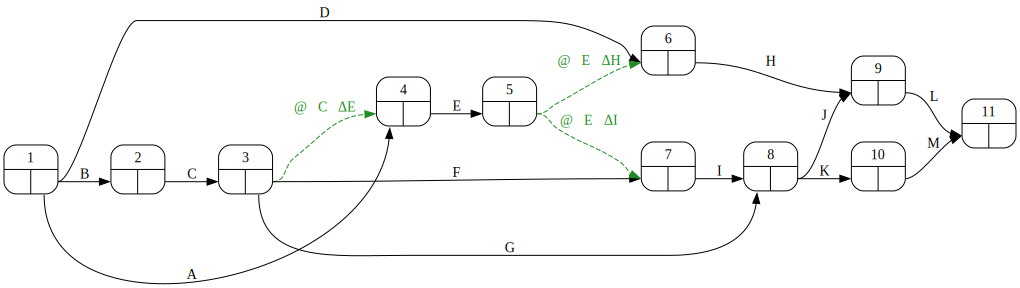

In [22]:
proyecto.pert(durations=False, ranksep=0.6)

In [23]:
pd.Series({key: ', '.join(sorted(list(value))) for key, value in proyecto.distant_predecessor().items()})

A                                
B                                
C                               B
D                                
E                         A, B, C
F                            B, C
G                            B, C
H                   A, B, C, D, E
I                   A, B, C, E, F
J             A, B, C, E, F, G, I
K             A, B, C, E, F, G, I
L    A, B, C, D, E, F, G, H, I, J
M          A, B, C, E, F, G, I, K
dtype: object

## 4. Calcular utilizando el método de Zaderenko los tiempos tempranos y tardíos

In [24]:
proyecto.zaderenko(duraciones)

,1,2,3,4,5,6,7,8,9,10,11,early
1,,6.0,,4.0,,6.0,,,,,,0.0
2,,,9.0,,,,,,,,,6.0
3,,,,0.0,,,4.0,15.0,,,,15.0
4,,,,,11.0,,,,,,,15.0
5,,,,,,0.0,0.0,,,,,26.0
6,,,,,,,,,6.0,,,26.0
7,,,,,,,,13.0,,,,26.0
8,,,,,,,,,6.0,11.0,,39.0
9,,,,,,,,,,,13.0,45.0
10,,,,,,,,,,,6.0,50.0


In [25]:
proyecto.calculate_pert(durations=duraciones)['nodes']

,early,late
1,0,0
2,6,6
3,15,15
4,15,15
5,26,26
6,26,39
7,26,26
8,39,39
9,45,45
10,50,52


## 5. Calcular las holguras totales de las actividades

In [26]:
proyecto.calculate_pert(duraciones)['activities']

,H_total
@∇C⤑ΔE,0
@∇E⤑ΔH,13
@∇E⤑ΔI,0
A,11
B,0
C,0
D,33
E,0
F,7
G,9


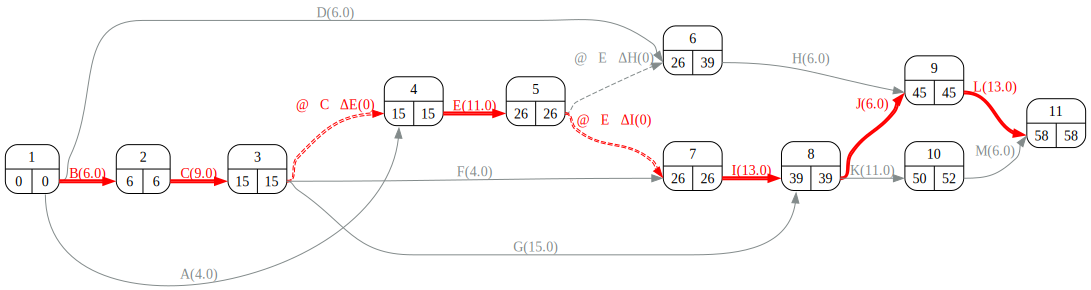

In [27]:
proyecto.pert(durations=duraciones, ranksep=0.3)

## 6. Calcular los costes unitarios de reducción

In [28]:
datos_proyecto['CUR'] = datos_proyecto.eval("ceil((Ctope-Cmedia)/(Dmedia-Dtope))")
datos_proyecto.loc[:, [  'Ctope','Cmedia', 'Dmedia', 'Dtope',  'CUR']]

,Ctope,Cmedia,Dmedia,Dtope,CUR
A,10,5,4.0,1,2.0
B,12,4,6.0,2,2.0
C,43,35,9.0,3,2.0
D,54,35,6.0,1,4.0
E,23,25,11.0,2,-0.0
F,34,23,4.0,1,4.0
G,23,12,15.0,3,1.0
H,54,34,6.0,2,5.0
I,65,44,13.0,3,3.0
J,67,55,6.0,2,3.0
